In [1]:
pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in c:\programdata\anaconda3\lib\site-packages (0.1.63)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
# Download AAPL ticker from 1 Jan 2000 to 31 Dec 2010
df = yf.download ("AAPL", start = "2000-01-01", end = "2010-12-31")

# Keep the adjusted price only 
df = df.loc [:, ["Adj Close"]]

# change the header "Adj Close" to "adj_close"
df.rename (columns = {"Adj Close":"adj_close"}, inplace = True)

# print the first five rows 
df.head()

[*********************100%***********************]  1 of 1 completed


,adj_close
Date,
1999-12-31,0.789364
2000-01-03,0.859423
2000-01-04,0.786965
2000-01-05,0.798481
2000-01-06,0.729382


# Simple Returns vs Log Returns

In [4]:
# Calculate the daily price changes - simple returns 
df["simple_rtn"] = df.adj_close.pct_change()

# Calculate the daily price changes - log returns 
# shift moves dates back by 1
df["log_rtn"] = np.log (df.adj_close / df.adj_close.shift(1))

# print the first five rows 
df.head()

,adj_close,simple_rtn,log_rtn
Date,,,
1999-12-31,0.789364,NaN,NaN
2000-01-03,0.859423,0.088754,0.085034
2000-01-04,0.786965,-0.084310,-0.088077
2000-01-05,0.798481,0.014633,0.014527
2000-01-06,0.729382,-0.086538,-0.090514


In [5]:
# Remove the first row - NaN error 
df.drop('adj_close', axis=1, inplace=True)
df.dropna(axis=0, inplace=True)

# print the first five rows 
df.head()

,simple_rtn,log_rtn
Date,,
2000-01-03,0.088754,0.085034
2000-01-04,-0.084310,-0.088077
2000-01-05,0.014633,0.014527
2000-01-06,-0.086538,-0.090514
2000-01-07,0.047369,0.046281


# Changing frequency 

In [6]:
# Define the function for calculating the realised volatility
def realised_volatility (x):
    return np.sqrt (np.sum (x ** 2))

In [7]:
# Calculate the monthly realised volatility
df_rv = df.groupby (pd.Grouper (freq = "M")).apply (realised_volatility)
df_rv.rename (columns = {"log_rtn":"rv"}, inplace = True)

In [8]:
# Annualise the monthly volatility
df_rv.rv = df_rv.rv * np.sqrt (12)

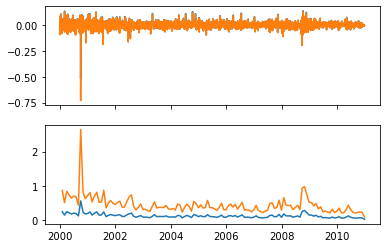

In [9]:
# Plot the results
fig, ax = plt.subplots (2, 1, sharex = True)
ax [0].plot(df)
ax [1].plot(df_rv)

# plt.tight_layout()
# plt.savefig('images/ch1_im6.png')
plt.show()